In [ ]:
pip install pandas numpy scikit-learn xgboost


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# After uploading, you can load the CSV file
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv("CleanedSoilDataset_With_RefinedSoilQuality.csv")


# Encode Soil_Quality labels (Poor=0, Moderate=1, Good=2, Excellent=3)
label_encoder = LabelEncoder()
df['Soil_Quality'] = label_encoder.fit_transform(df['Soil_Quality'])

# Define features (X) and target (y)
X = df.drop(columns=['Soil_Quality'])
y = df['Soil_Quality']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Saving CleanedSoilDataset_With_RefinedSoilQuality.csv to CleanedSoilDataset_With_RefinedSoilQuality.csv


## multimodel using 3 model

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg_model = LogisticRegression(max_iter=500, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)

ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model),
                ('log_reg', log_reg_model),
                ('mlp', mlp_model)],
    voting='soft'  # Use soft voting (averaging predicted probabilities)
)

ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('log_reg',
                              LogisticRegression(max_iter=500,
                                                 random_state=42)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(64, 32),
                                            max_iter=500, random_state=42))],
                 voting='soft')

In [ ]:
y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9928007023705004

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1139
           1       0.98      0.98      0.98      1139
           2       0.97      0.95      0.96      1139
           3       0.97      0.97      0.97      1139
           4       0.99      1.00      0.99      1139

    accuracy                           0.98      5695
   macro avg       0.98      0.98      0.98      5695
weighted avg       0.98      0.98      0.98      5695


Confusion Matrix:
 [[1137    0    2    0    0]
 [   0 1124    0    0   15]
 [  10    0 1125    4    0]
 [   0    6    4 1129    0]
 [   0    0    0    0 1139]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Classification report
#classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy: ", accuracy)
#print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy:  0.9928007023705004

Confusion Matrix:
 [[1137    0    2    0    0]
 [   0 1124    0    0   15]
 [  10    0 1125    4    0]
 [   0    6    4 1129    0]
 [   0    0    0    0 1139]]


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Hyperparameters to tune for MLP (Neural Network)
mlp_params = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000]
}

# Set up GridSearchCV for Random Forest with n_jobs=1
rf_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy', n_jobs=1)
rf_search.fit(X_train, y_train)

# Set up GridSearchCV for MLP with n_jobs=1
mlp_search = GridSearchCV(MLPClassifier(), mlp_params, cv=5, scoring='accuracy', n_jobs=1)
mlp_search.fit(X_train, y_train)

# Print best parameters for Random Forest and MLP
print("Best parameters for Random Forest: ", rf_search.best_params_)
print("Best parameters for MLP: ", mlp_search.best_params_)


Best parameters for Random Forest:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for MLP:  {'activation': 'tanh', 'hidden_layer_sizes': (64, 32), 'max_iter': 1000}


In [ ]:
# Predictions on test data
y_pred = ensemble_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Classification report
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy: ", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy:  0.981301027126679

Classification Report:
               precision    recall  f1-score   support

        Good       0.99      0.94      0.96       712
    Moderate       0.98      1.00      0.99      2948
        Poor       0.98      0.89      0.93       137

    accuracy                           0.98      3797
   macro avg       0.98      0.94      0.96      3797
weighted avg       0.98      0.98      0.98      3797


Confusion Matrix:
 [[ 668   44    0]
 [  10 2936    2]
 [   0   15  122]]


In [ ]:
# Updated Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,  # Updated from 200 to 100
    max_depth=None,
    min_samples_split=2,
    random_state=42
)

# Updated MLP model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Updated from (128, 64) to (64, 32)
    activation='tanh',
    max_iter=1000,
    random_state=42
)

# Logistic Regression remains the same
log_reg_model = LogisticRegression(max_iter=500, random_state=42)

# Updated Voting Classifier with best parameters
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('log_reg', log_reg_model),
        ('mlp', mlp_model)
    ],
    voting='soft'
)

# Train the optimized ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     random_state=42)),
                             ('log_reg',
                              LogisticRegression(max_iter=500,
                                                 random_state=42)),
                             ('mlp',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(64, 32),
                                            max_iter=500, random_state=42))],
                 voting='soft')

In [ ]:
# Predictions on test data
y_pred = ensemble_model.predict(X_test)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
#classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Updated Model Accuracy:", accuracy)
#print("\nUpdated Classification Report:\n", classification_rep)
print("\nUpdated Confusion Matrix:\n", conf_matrix)


Updated Model Accuracy: 0.9926251097453906

Updated Confusion Matrix:
 [[1138    0    1    0    0]
 [   0 1130    0    1    8]
 [  20    0 1113    6    0]
 [   0    4    1 1134    0]
 [   0    1    0    0 1138]]


In [ ]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# stacked_model = StackingClassifier(
#     estimators=[
#         ('rf', rf_model),
#         ('log_reg', log_reg_model),
#         ('mlp', mlp_model),
#         ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42))
#     ],
#     final_estimator=LogisticRegression()  # Meta-model
# )

# # Train the stacking model
# stacked_model.fit(X_train, y_train)


## Multimodel using 5 models


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

label_encoder = LabelEncoder()
df['Soil_Quality'] = label_encoder.fit_transform(df['Soil_Quality'])

X = df.drop(columns=['Soil_Quality'])
y = df['Soil_Quality']

feature_selector = RFE(ExtraTreesClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
X_selected = feature_selector.fit_transform(X, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
lgbm_model = LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)
extra_trees_model = ExtraTreesClassifier(n_estimators=200, max_depth=20, random_state=42)
svc_model = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lgbm', lgbm_model),
        ('extra_trees', extra_trees_model),
        ('svc', svc_model),
        ('knn', knn_model)
    ],
    voting='soft'
)

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)

class_labels = [str(label) for label in label_encoder.classes_]

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=class_labels)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Optimized Model Accuracy:", accuracy)
print("\nOptimized Classification Report:\n", classification_rep)
print("\nOptimized Confusion Matrix:\n", conf_matrix)



/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2408
[LightGBM] [Info] Number of data points in the train set: 22780, number of used features: 10
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Optimized Model Accuracy: 0.9761194029850746

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1139
           1       0.98      0.98      0.98      1139
           2       0.97      0.95      0.96      1139
           3       0.97      0.97      0.97      1139
           4       0.99      1.00      0.99      1139

    accuracy                           0.98      5695
   macro avg       0.98      0.98      0.98      5695
weighted avg       0.98      0.98      0.98      5695


Optimized Confusion Matrix:
 [[1125    0   14    0    0]
 [   0 1112    0   10   17]
 [  33    0 1086   20    0]
 [   0   23   15 1101    0]
 [   0    4    0    0 1135]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


🔹 Model Accuracy: 0.9761194029850746

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1139
           1       0.98      0.98      0.98      1139
           2       0.97      0.95      0.96      1139
           3       0.97      0.97      0.97      1139
           4       0.99      1.00      0.99      1139

    accuracy                           0.98      5695
   macro avg       0.98      0.98      0.98      5695
weighted avg       0.98      0.98      0.98      5695



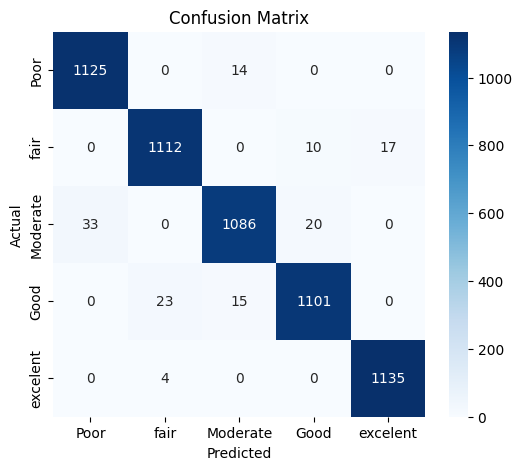

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("🔹 Model Accuracy:", accuracy)

print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Poor","fair", "Moderate", "Good","excelent"],
            yticklabels=["Poor","fair", "Moderate", "Good","excelent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
train_accuracy = ensemble_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

test_accuracy = ensemble_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training Accuracy: 0.9997


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Test Accuracy: 0.9761


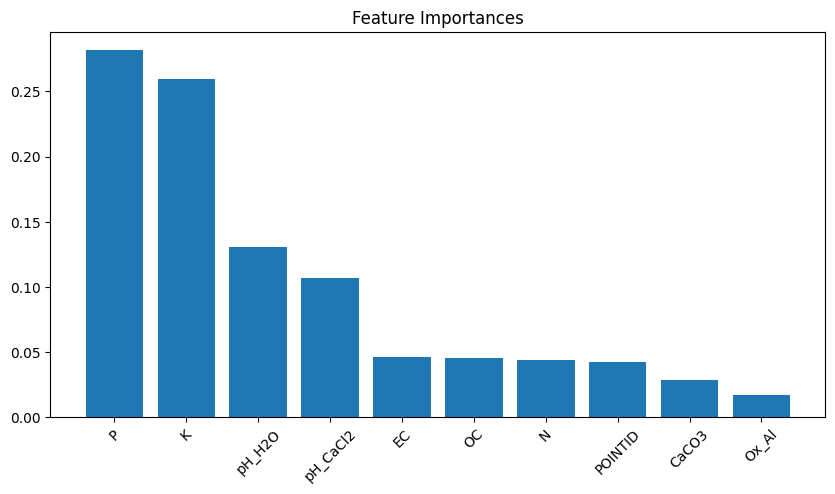

In [ ]:
import matplotlib.pyplot as plt
feature_names = X.columns[feature_selector.get_support()]
importances = feature_selector.estimator_.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Define correct feature names (as used in training)
all_feature_names = ['POINTID',  'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K','Ox_Al','Ox_Fe']

# Generate synthetic unseen data
unseen_data = pd.DataFrame({
    "POINTID": [66, 16, 5],
    "pH_CaCl2": [4.259, 6.934, 6.219],
    "pH_H2O": [6.022, 6.325, 4.324],
    "EC": [1.856, 0.367, 1.766],
    "OC": [0.875, 2.333, 2.152],
    "CaCO3": [1.673, 9.670, 3.737],
    "P": [49.936, 29.035, 13.645],
    "N": [0.389, 0.462, 0.279],
    "K": [20.292, 193.669, 88.723],
    "Ox_Al": [0.179, 0.300, 0.120],
    "Ox_Fe": [2.817, 2.366, 0.529],
})

print("Generated Unseen Data:")
print(unseen_data)

# Ensure the columns are in the correct order
unseen_data = unseen_data[all_feature_names]

# Apply preprocessing
unseen_data_selected = feature_selector.transform(unseen_data)  # Feature selection
unseen_data_scaled = scaler.transform(unseen_data_selected)     # Standardization

# Predict soil quality on unseen data
predictions = ensemble_model.predict(unseen_data_scaled)
predicted_labels = label_encoder.inverse_transform(predictions)

# Print results
unseen_data['Predicted Soil Quality'] = predicted_labels
print("\nPredictions on Unseen Data:")
print(unseen_data)


Generated Unseen Data:
   POINTID  pH_CaCl2  pH_H2O     EC     OC  CaCO3       P      N        K  \
0       66     4.259   6.022  1.856  0.875  1.673  49.936  0.389   20.292   
1       16     6.934   6.325  0.367  2.333  9.670  29.035  0.462  193.669   
2        5     6.219   4.324  1.766  2.152  3.737  13.645  0.279   88.723   

   Ox_Al  Ox_Fe  
0  0.179  2.817  
1  0.300  2.366  
2  0.120  0.529  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 10 features, but StandardScaler is expecting 11 features as input.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek  # Improved SMOTE strategy
from sklearn.calibration import CalibratedClassifierCV
import shap  # Feature importance analysis

# Load and encode Soil_Quality labels
label_encoder = LabelEncoder()
df['Soil_Quality'] = label_encoder.fit_transform(df['Soil_Quality'])

# Define features and target
X = df.drop(columns=['Soil_Quality'])
y = df['Soil_Quality']

# Feature Selection using SHAP (More Reliable than RFE)
lgbm_temp = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_temp.fit(X, y)
explainer = shap.TreeExplainer(lgbm_temp)
shap_values = explainer.shap_values(X)
shap_importance = np.abs(shap_values).mean(axis=0).sum(axis=0)
selected_features = X.columns[np.argsort(shap_importance)[-10:]]  # Select top 10 features
X_selected = X[selected_features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Handle class imbalance using SMOTETomek (Better than standard SMOTE)
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_scaled, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Define new models with class_weight adjustments
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=20, min_samples_split=2, class_weight="balanced", random_state=42
)
lgbm_model = LGBMClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=10, class_weight="balanced", random_state=42
)
extra_trees_model = ExtraTreesClassifier(n_estimators=200, max_depth=20, random_state=42)
svc_model = SVC(probability=True, kernel='rbf', C=1, gamma='scale', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Apply Platt Scaling (Calibrated SVC for better probability estimates)
svc_calibrated = CalibratedClassifierCV(svc_model, cv=3)  # Calibrated SVC

# Improved Ensemble Model
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('lgbm', lgbm_model),
        ('extra_trees', extra_trees_model),
        ('svc', svc_calibrated),  # Use calibrated SVC
        ('knn', knn_model)
    ],
    voting='soft'
)

# Train the optimized ensemble model
ensemble_model.fit(X_train, y_train)

# Predictions
y_pred = ensemble_model.predict(X_test)

# Convert class labels to string before passing to classification_report
class_labels = [str(label) for label in label_encoder.classes_]

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=class_labels)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Optimized Model Accuracy:", accuracy)
print("\nOptimized Classification Report:\n", classification_rep)
print("\nOptimized Confusion Matrix:\n", conf_matrix)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2257
[LightGBM] [Info] Number of data points in the train set: 18984, number of used features: 11
[LightGBM] [Info] Start training from score -1.674398
[LightGBM] [Info] Start training from score -0.253032
[LightGBM] [Info] Start training from score -3.320474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 33704, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Optimized Model Accuracy: 0.8626869214336578

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2771
           1       0.89      0.66      0.76      2739
           2       0.92      1.00      0.96      2916

    accuracy                           0.86      8426
   macro avg       0.87      0.86      0.86      8426
weighted avg       0.87      0.86      0.86      8426


Optimized Confusion Matrix:
 [[2553  218    0]
 [ 674 1807  258]
 [   0    7 2909]]


## only lgbm model

In [ ]:
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # Handling class imbalance
# class_counts = Counter(y_train)
# minority_class = min(class_counts, key=class_counts.get)
# majority_class = max(class_counts, key=class_counts.get)
# scale_pos_weight = class_counts[majority_class] / class_counts[minority_class]

# # Apply SMOTE to balance the dataset
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Define LightGBM model
# lgbm = LGBMClassifier(
#     boosting_type='gbdt',
#     objective='multiclass',
#     num_class=3,
#     is_unbalance=False,  # Set to False since SMOTE is applied
#     scale_pos_weight=scale_pos_weight,  # Adjusting class weight manually
#     force_col_wise=True  # Helps with memory efficiency
# )

# # Define hyperparameter grid
# param_dist = {
#     'num_leaves': [50, 75, 100, 150],
#     'max_depth': [4, 6, 8, 10, 12],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'min_data_in_leaf': [10, 20, 30, 50],
#     'feature_fraction': [0.6, 0.75, 0.9],
#     'lambda_l1': [0.1, 1.0, 10.0],
#     'lambda_l2': [0.1, 1.0, 10.0]
# }

# # Perform randomized search
# random_search = RandomizedSearchCV(
#     lgbm, param_distributions=param_dist,
#     n_iter=min(10, np.prod([len(v) for v in param_dist.values()])),  # Ensuring valid iteration count
#     scoring='accuracy', cv=5, verbose=2, n_jobs=-1, random_state=42
# )

# # Train model with best parameters
# random_search.fit(X_resampled, y_resampled)

# # Print best parameters
# print("Best Params:", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 35

In [ ]:
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Handling class imbalance
# class_counts = Counter(y_train)
# minority_class = min(class_counts, key=class_counts.get)
# majority_class = max(class_counts, key=class_counts.get)
# scale_pos_weight = class_counts[majority_class] / class_counts[minority_class]

# # Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Define the final LightGBM model with best hyperparameters
# final_lgbm = LGBMClassifier(
#     boosting_type='gbdt',
#     objective='multiclass',
#     num_class=3,
#     num_leaves=100,
#     min_data_in_leaf=10,
#     max_depth=12,
#     learning_rate=0.05,
#     lambda_l2=1.0,
#     lambda_l1=0.1,
#     feature_fraction=0.6,
#     scale_pos_weight=scale_pos_weight,
#     random_state=42,
#     force_col_wise=True
# )

# # Train the final model
# final_lgbm.fit(X_resampled, y_resampled)

# # Evaluate the model (Replace X_test and y_test with actual test data)
# accuracy = final_lgbm.score(X_test, y_test)
# print(f"Final Model Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 35

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
Final Model Accuracy: 0.9968


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1


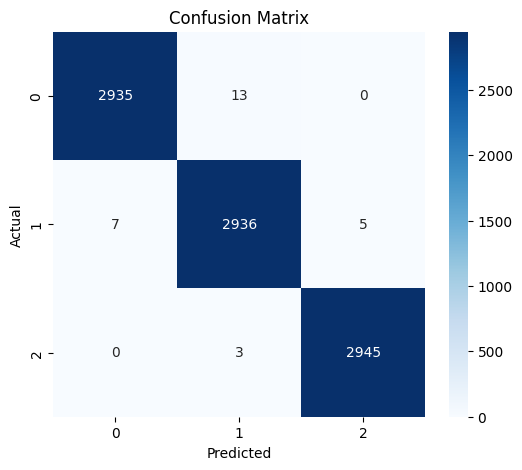

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2948
           1       0.99      1.00      1.00      2948
           2       1.00      1.00      1.00      2948

    accuracy                           1.00      8844
   macro avg       1.00      1.00      1.00      8844
weighted avg       1.00      1.00      1.00      8844



<ipython-input-12-1de9d2ced077>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, orient='h', palette="viridis")


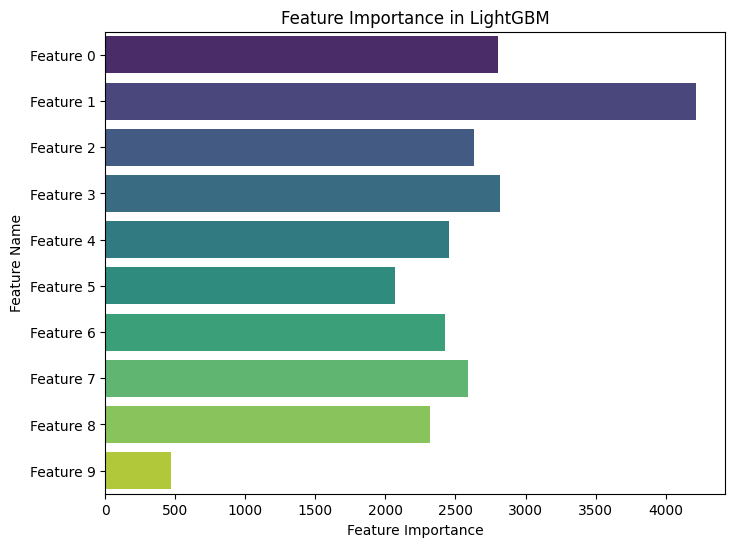

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, classification_report
# import lightgbm as lgb

# # Get predictions on the test set
# y_pred = random_search.best_estimator_.predict(X_test)

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # Classification Report
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Check if X_train is a DataFrame, else define feature names manually
# if isinstance(X_train, np.ndarray):
#     feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]  # Generic names
# else:
#     feature_names = X_train.columns  # Use actual column names if DataFrame

# # Feature Importance Plot
# feature_importances = random_search.best_estimator_.feature_importances_

# plt.figure(figsize=(8, 6))
# sns.barplot(x=feature_importances, y=feature_names, orient='h', palette="viridis")
# plt.xlabel("Feature Importance")
# plt.ylabel("Feature Name")
# plt.title("Feature Importance in LightGBM")
# plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
Test Data Accuracy: 0.330393487109905
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2948
           1       0.33      0.99      0.50      2948
           2       0.00      0.00      0.00      2948

    accuracy                           0.33      8844
   macro avg       0.11      0.33      0.17      8844
weighted avg       0.11      0.33      0.17      8844



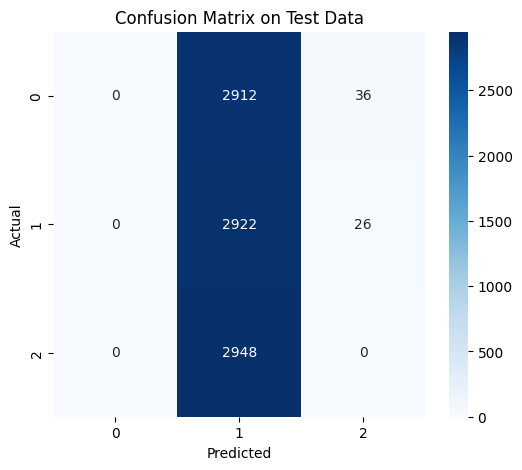

In [ ]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Ensure X_test is preprocessed the same way as X_train
# X_test_scaled = scaler.transform(X_test)

# # Make predictions using the trained model
# y_pred_test = final_lgbm.predict(X_test_scaled)

# # Evaluate model performance
# print("Test Data Accuracy:", accuracy_score(y_test, y_pred_test))
# print("Classification Report:\n", classification_report(y_test, y_pred_test))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_test)
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
# plt.xlabel("Predicted")
# # plt.ylabel("Actual")
# plt.title("Confusion Matrix on Test Data")
# plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=1.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
Test Data Accuracy: 0.9990

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2885
           1       1.00      1.00      1.00      2538
           2       1.00      1.00      1.00      2944

    accuracy                           1.00      8367
   macro avg       1.00      1.00      1.00      8367
weighted avg       1.00      1.00      1.00      8367



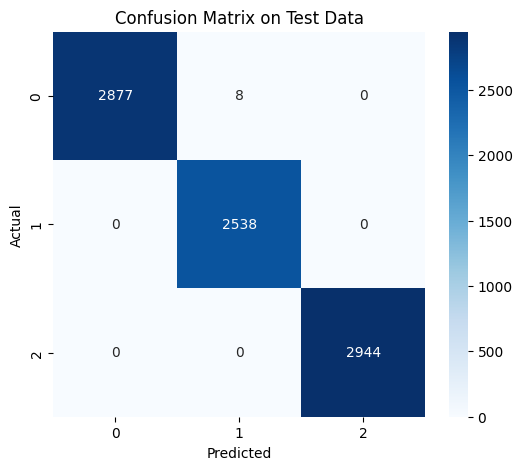

In [ ]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Predict on test data
# y_pred_test = final_lgbm.predict(X_test)

# # Calculate accuracy
# test_accuracy = accuracy_score(y_test, y_pred_test)
# print(f"Test Data Accuracy: {test_accuracy:.4f}")

# # Generate classification report
# print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# # Compute Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_test)

# # Visualizing Confusion Matrix
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix on Test Data")
# plt.show()
